# Version required to run this notebook:
numpy version    : 1.15.4  
pandas version    : 0.23.4  
seaborn version    : 0.9.0  

In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
import scipy.stats
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)
# Setting the format type explicitly to avoid scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Reading the csv file and printing the shape of the data set
loan_master = pd.read_csv("./loan.csv", low_memory = False)
print("The initial data set comprises of",loan_master.shape[0],"records and", loan_master.shape[1],"columns")

The initial data set comprises of 39717 records and 111 columns


# Data Understanding

In [3]:
#Header section of the master dataframe
loan_master.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


#### Since the objective of this EDA is to identify the driver variables that lead to default loans, we can consider loan_status as the dependent variable and all the other variables as the independent variables which can have a varying influence on the target variable which is  loan_status

In [4]:
# Value counts for the loan_status variable
loan_master.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [5]:
# Since we are interested in identifying patterns that related to either Fully Paid loand or Charged off loans, we 
# can filter out the rows where loan_status is Current and naming the resultant dataframe as df_sub
loan_master = loan_master.loc[loan_master['loan_status']!= 'Current']

In [6]:
# Printing the shape of the dataframe containing values where loan status is either 'Fully Paid' or 'Current'
print(loan_master.shape) 

(38577, 111)


In [7]:
# Value counts for the loan_status variable
loan_master.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### As noticed above this is an imbalanced data set with only 17% of its records  having its loan status as charged off

# Data Cleaning

In [8]:
#Checking for the percentage of null values in loan_master
round(100*(loan_master.isnull().sum()/len(loan_master.index)), 2)

id                                 0.000
member_id                          0.000
loan_amnt                          0.000
funded_amnt                        0.000
funded_amnt_inv                    0.000
term                               0.000
int_rate                           0.000
installment                        0.000
grade                              0.000
sub_grade                          0.000
emp_title                          6.190
emp_length                         2.680
home_ownership                     0.000
annual_inc                         0.000
verification_status                0.000
issue_d                            0.000
loan_status                        0.000
pymnt_plan                         0.000
url                                0.000
desc                              32.470
purpose                            0.000
title                              0.030
zip_code                           0.000
addr_state                         0.000
dti             

In [9]:
mis_100 = (round(100*(loan_master.isnull().sum()/len(loan_master.index)), 2) == 100)
print("The number of variables having 100% of their values as missing are",len(loan_master.columns[mis_100].tolist()))

The number of variables having 100% of their values as missing are 55


In [10]:
#Dropping the 54 variables where all or 100% the values are missing and creating a new dataframe loan_clean
loan_clean = loan_master.dropna(axis = 1, how = 'all')

In [11]:
# Printing the shape of the dataset after the 54 variables containing all null values have been dropped
print("After dropping the 54 variables containing 100% of their values as null we have",loan_clean.shape[0],"records and", loan_clean.shape[1],"columns in the new dataframe loan_clean")

After dropping the 54 variables containing 100% of their values as null we have 38577 records and 56 columns in the new dataframe loan_clean


In [12]:
# Identifying the list of columns where the percentage of missing values is greater than 30%
mis_30 = (round(100*(loan_clean.isnull().sum()/len(loan_clean.index)), 2) >30)

In [13]:
print("The variables having greater than 30% of missing values are",loan_clean.columns[mis_30].tolist())

The variables having greater than 30% of missing values are ['desc', 'mths_since_last_delinq', 'mths_since_last_record']


In [14]:
# Dropping the 4 variables where more than 30% of it values are missing
loan_clean = loan_clean.drop(loan_clean.columns[mis_30].tolist(), axis = 1)

In [15]:
print("After dropping the 4 variables containing greater than 30% of their values as null we have",loan_clean.shape[0],"records and", loan_clean.shape[1],"columns")

After dropping the 4 variables containing greater than 30% of their values as null we have 38577 records and 53 columns


In [16]:
# Checking if any of the rows contain all null values
loan_clean.isnull().all(axis=1).sum()

0

In [17]:
print("Number of records having atleast 1 missing value:",loan_clean[loan_clean.isnull().sum(axis =1)>1].shape[0])
print("Number of records having atleast 2 missing values:",loan_clean[loan_clean.isnull().sum(axis =1)>2].shape[0])
print("Number of records having atleast 3 missing values:",loan_clean[loan_clean.isnull().sum(axis =1)>3].shape[0])
print("Number of records having atleast 4 missing values:",loan_clean[loan_clean.isnull().sum(axis =1)>4].shape[0])
print("Number of records having atleast 5 missing values:",loan_clean[loan_clean.isnull().sum(axis =1)>5].shape[0])

Number of records having atleast 1 missing value: 1077
Number of records having atleast 2 missing values: 64
Number of records having atleast 3 missing values: 41
Number of records having atleast 4 missing values: 7
Number of records having atleast 5 missing values: 0


In [18]:
#### As seen above none of the rows contain more than 4 missing values. So we have decided to not drop any rows

In [19]:
# Understanding the count of unique values in the dataframe
loan_clean.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                    

#### As shown above, the data frame consists of 11 variables where all the corresponding values are unique. Since variables having unique values will not have a significant difference in means across the two populations which is the records having their corresponding loan status as Fully Paid vs records having loan status as Charged off. It is therefore safe to drop these unique value columns since these values are more like constants which would not influence the value of the dependent varable loan_status

In [20]:
# Dropping the variables where the count of unique values is equal to 1. 
unique_cols = loan_clean.nunique()==1
loan_clean = loan_clean.drop(loan_clean.columns[unique_cols].tolist(), axis = 1)

In [21]:
print("After dropping the unique value columns, the remaining number of columns are", loan_clean.shape[1], "and the number of records reamining are", loan_clean.shape[0])

After dropping the unique value columns, the remaining number of columns are 42 and the number of records reamining are 38577


#### So far, the loan dataframe has been cleaned basing on the issues with the null values. Now let's filter the data set basing on the business understanding of this use case

In [22]:
loan_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
loan_clean.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000


**Following columns have been considered to be dropped for the reasons mentioned below:**
* **id** – these values are more like audit variables and donot have any impact on the loan_status
* **member_id** – these values are more like audit variables and donot have any impact on the loan_status
* **url** – This is again a text value which would not impact the loan_status
* **title** – This is again a text value with many distinct unique value counts which would not impact the loan_status
* **zip_code** – The complete zipcode is missing and we have the state variable any ways for location based analysis
* **last_pymnt_d** – Comes into picture only when loan is non-default so this is not related to charged off loans
* **total_rec_int** - Comes into picture only when loan is being paid (non-default) so this is not related to charged off loans
* **total_rec_late_fee** - Comes into picture only when the loan is being paid (non-default) so this is not related to charged off loans
* **recoveries** – since this is post charge off, this would not give insight into the loan_status prior to the charge off
* **collection_recovery_fee** – since this is post charge off, this would not give insight into the loan_status prior to the charge off
* **last_pymnt_amnt** –  Comes into picture only when loan is being paid (non-default) so this is not related to charged off loans
* **total_pymnt** - this comes into existence post closure of the loan account, hence cannot provide any predictive insight
* **total_pymnt_inv** - this comes into existence post closure of the loan account, hence cannot provide any predictive insight
* **total_rec_prncp** - this comes into existence post closure of the loan account, hence cannot provide any predictive insight

In [24]:
col_drop = ['id','member_id','url','title','zip_code','last_pymnt_d','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','last_pymnt_amnt','total_pymnt','total_pymnt_inv','total_rec_prncp']
loan_clean = loan_clean.drop(col_drop, axis =1)

In [25]:
print("After dropping the columns which are not needed from a business perspective, the remaining number of columns are", loan_clean.shape[1], "and the number of records reamining are", loan_clean.shape[0])

After dropping the columns which are not needed from a business perspective, the remaining number of columns are 28 and the number of records reamining are 38577


In [26]:
loan_clean.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

# Deriving Variables

In [27]:
#Loan to income ratio
loan_clean['loan_incm_ratio'] = loan_clean['loan_amnt']/loan_clean['annual_inc']

In [28]:
#Open acc to total acc
loan_clean['open_total_acc'] = loan_clean['open_acc']/loan_clean['total_acc']

In [29]:
# Stripping out the 'months' text from term
loan_clean['term'] = loan_clean.term.map(lambda x: x.strip(' months'))

In [30]:
loan_clean.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,loan_incm_ratio,open_total_acc
0,5000,5000,4975.000,36,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.000,0.208,0.333
1,2500,2500,2500.000,60,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.000,0.083,0.750


Employment Title : Remove 'n/a' value with 'self-employed'.
There are some values in emp_title which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [31]:
# Replacing n/a in emp_title with 'Self_employed'
loan_clean.emp_title.replace(['n/a'],'Self-Employed',inplace=True)

# Replacing n/a in emp_length with '0'
loan_clean.emp_length.replace(['n/a'],'0',inplace=True)
print(loan_clean.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [32]:
# If the loan purpose contribution is less than 75% then those values have been removed
del_loan_purpose = (loan_clean.purpose.value_counts()*100)/len(loan_clean)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan_clean.drop(labels = loan_clean[loan_clean.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan_clean.shape ,"rows & columns.")

print(loan_clean.purpose.unique())
print(loan_clean.head(2))

So now we are left with (34610, 30) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']
   loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment grade  \
0       5000         5000         4975.000   36   10.65%      162.870     B   
1       2500         2500         2500.000   60   15.27%       59.830     C   

  sub_grade emp_title emp_length home_ownership  annual_inc  \
0        B2       NaN  10+ years           RENT   24000.000   
1        C4     Ryder   < 1 year           RENT   30000.000   

  verification_status issue_d  loan_status      purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid  credit_card         AZ 27.650   
1     Source Verified  Dec-11  Charged Off          car         GA  1.000   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1

# Univariate analysis

In [33]:
# Defining the functions that would be used in performing Univariate analysis

In [34]:
def cross_tab_ratio(col):
    res=pd.crosstab(loan_clean[col], loan_clean.loan_status, values = loan_clean.loan_amnt, aggfunc='count').round(10).sort_values(by='Charged Off', ascending=False)
    res['ratio'] = res['Charged Off']/res['Fully Paid']
    return res

In [35]:
def plot_continuous_chart(axe, title, plottype, col, df, log):
    axe.set_title(title)
    if log==True:
        axe.set_yscale('log')
    if (plottype=='d'):   
        sns.distplot(df[col],ax=axe)
    else: 
        sns.boxplot(data =df, x=col,ax=axe,orient='v')
        
def plot_univariate_vs_loan_status(vtype,col,hue =None,log=False,vertlabel=False):
    df_fully_paid = loan_clean[loan_clean['loan_status']=='Fully Paid']
    df_charged_off = loan_clean[loan_clean['loan_status']=='Charged Off']
    if vtype == 'continuous':
        fig, ax=plt.subplots(nrows =2,ncols=3,figsize=(20,12))
        plot_continuous_chart(ax[0,0], "Distribution Plot", 'd', col, loan_clean, log)
        plot_continuous_chart(ax[0,1], "Fully Paid Distribution Plot", 'd', col, df_fully_paid, log)
        plot_continuous_chart(ax[0,2], "Charged Off Distribution Plot", 'd', col, df_charged_off, log)
        plot_continuous_chart(ax[1,0], "Box Plot", 'b', col, loan_clean, log)
        plot_continuous_chart(ax[1,1], "Fully Paid Box Plot", 'b', col, df_fully_paid, log)
        plot_continuous_chart(ax[1,2], "Charged Off Box Plot", 'b', col, df_charged_off, log)
    else:
        fig, ax = plt.subplots()
        hue_col = pd.Series(data = hue)
        width = len(loan_clean[col].unique()) + 6 + 4*len(hue_col.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = loan_clean, x= col, order=loan_clean[col].value_counts().index,hue = hue) 
        for p in  ax.patches:
            if (p.get_height() > 0):
                ax.annotate('{:1.2f}%'.format((p.get_height()*100)/float(len(loan_clean))), (p.get_x()+0.05, p.get_height()+20))  
    if (vertlabel== True): 
        plt.xticks(rotation=90)
    plt.show()        


### Analysis of individual variables

####  Loan Amount

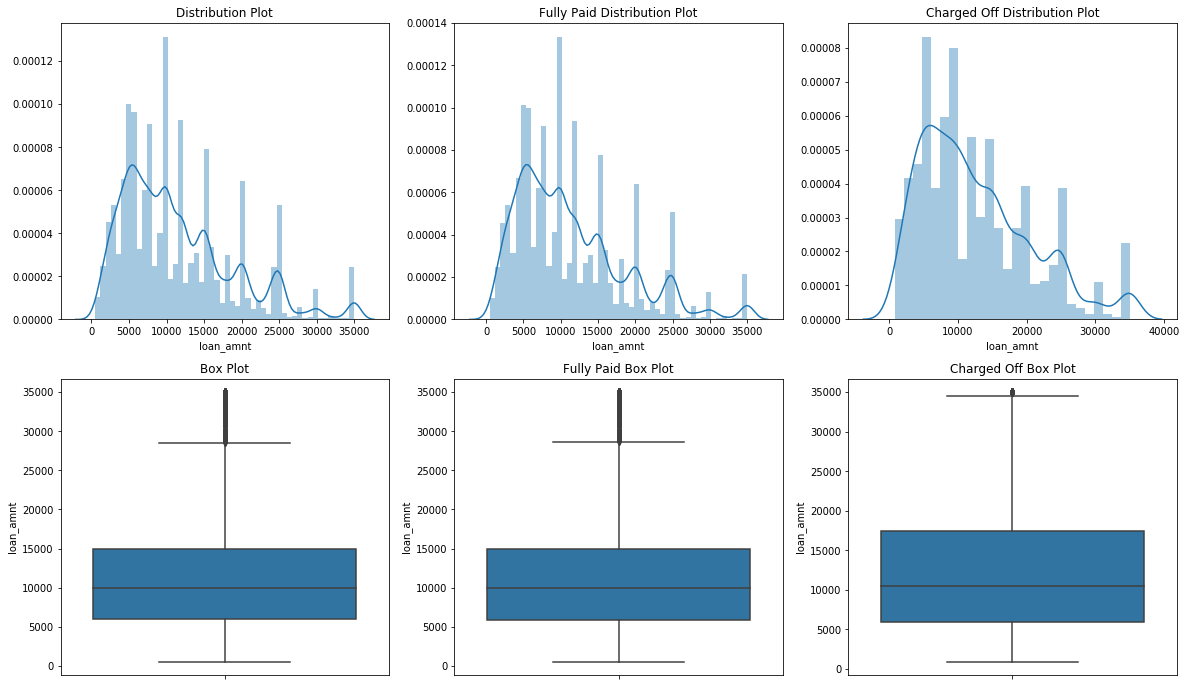

In [103]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='loan_amnt')


###### **Findings**
1. The loan amount of most people is in the range between 5000 and 15000 USD
1. Fully paid:  IQR ranges of loan amount ranges between 5000 and 15000 USD
2. Charged off: IQR ranges of loan amount ranges between 5000 and 16000 USD
1. There is not much difference between the mean for the two loan statuses so we cannot conclude it can be considered as a driving factor

#### Interest rate

In [37]:
#interest rate contains a % symbol and it needs to be removed for continous variable analysis
if(loan_clean['int_rate'].dtype != np.float64):
    loan_clean['int_rate'] = loan_clean['int_rate'].apply(lambda x: x.replace('%', '')).astype(float)   

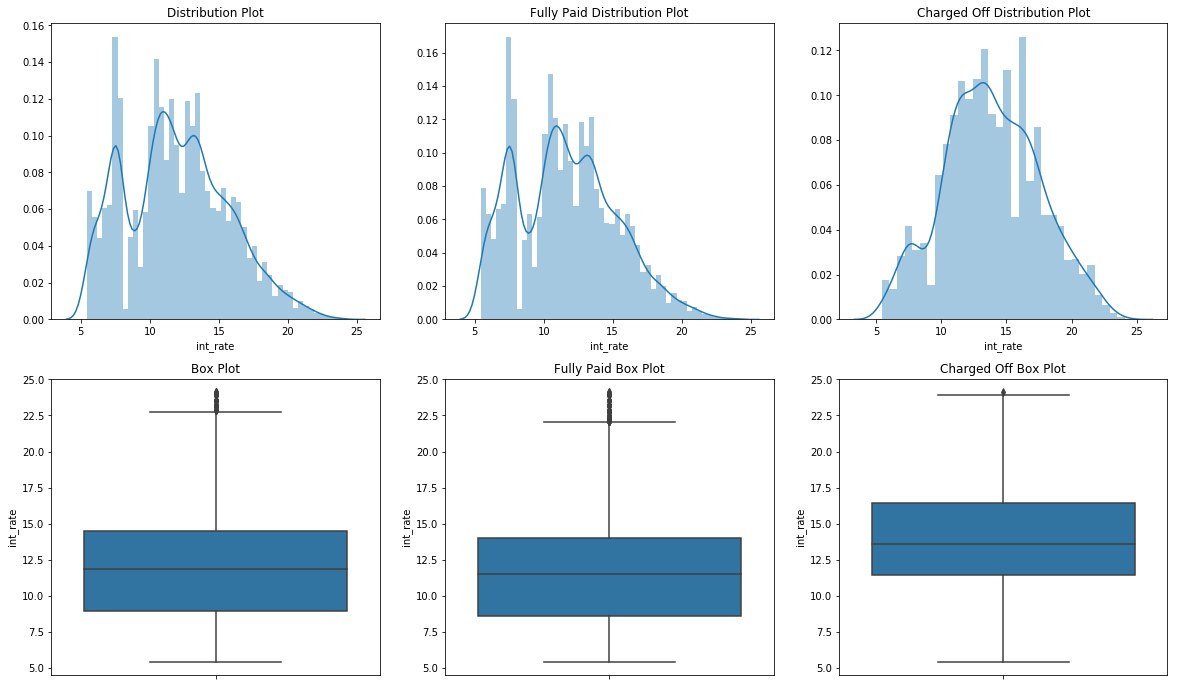

In [38]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='int_rate')

**Findings:**
1. IQR ranges of interest rate ranges between 8 and 14%
1. Fully paid:  IQR ranges of interest rate ranges between 8 and 14%
1. Charged off: IQR ranges of interest rate ranges between 11 and 16%
1. The mean interest rate for Charged off loans is higher than that of the Fully paid loans, so this variable can be considered as driving factor

#### Loan amount to Income ratio

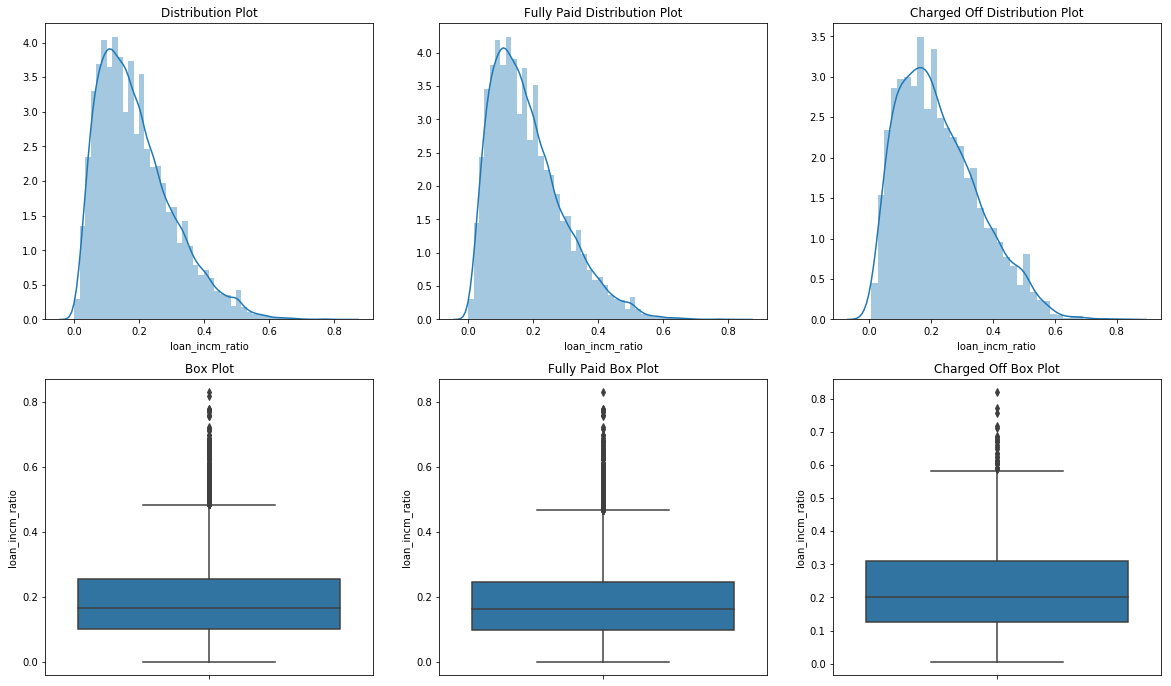

In [39]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='loan_incm_ratio')

**Findings:**
1. The mean for Charged off loans is higher than that of the Fully paid loans, so this variable can be considered as driving factor

#### Open account to Total account ratio

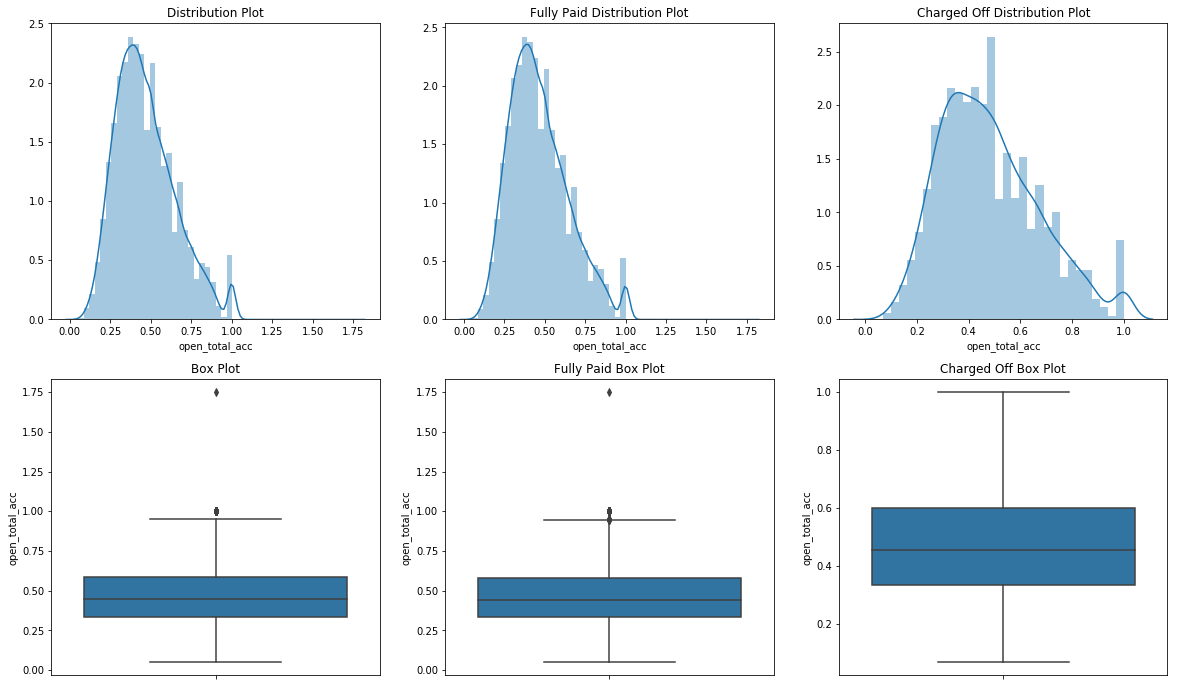

In [40]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='open_total_acc')

 **Findings:**
1. There is not much difference in the mean for Charged off loans and the Fully paid loans, so this variable cannot be considered as a driving factor

####  Term

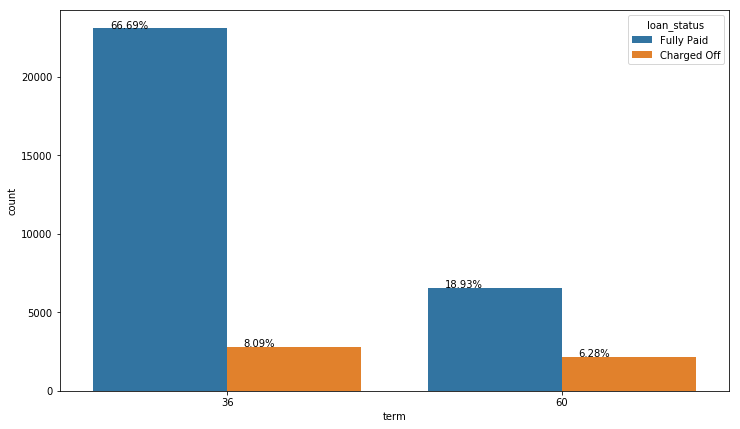

In [41]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='term',hue='loan_status')

**Findings:**
1. 75.43% people applied for 36 months term
1. Fully paid: Most of the people applied for 36 month term. 
1. Charged off: Most of the people applied for 36 month term. But the ratio of Charged off counts vs Fully Paid count is high for 60 months term. It looks like 60 months term can be one of the driving factors 

#### Grade

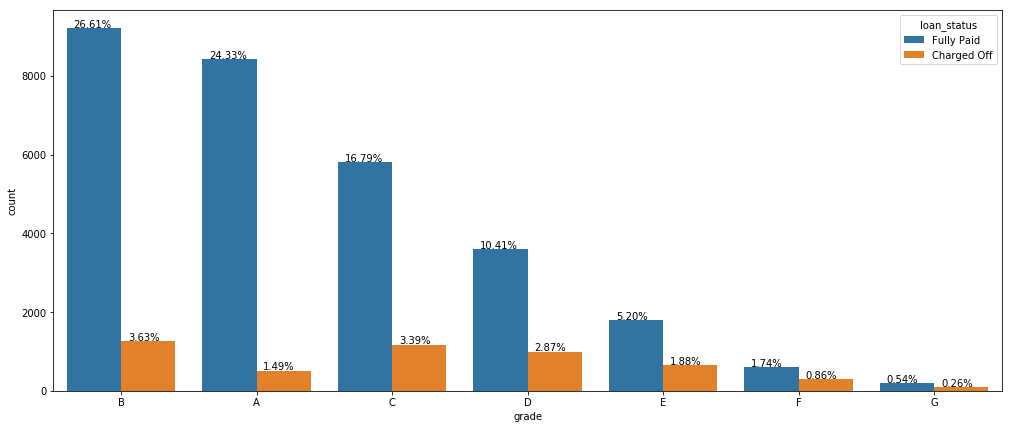

In [42]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='grade',hue='loan_status')

In [43]:
cross_tab_ratio('grade').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
grade,,,
F,298,601,0.496
G,90,188,0.479
E,649,1799,0.361
D,994,3603,0.276
C,1173,5812,0.202
B,1257,9211,0.136
A,514,8421,0.061


**Findings:**
1. Fully paid: most people belong to GRADE A and B. 
1. Charged off: Most people belong to GRADE B and C
1. The ratio of Charged Off counts to Fully Paid is high for grades E, F and G and the count for each Grade is above 30. So this variable seems to be one of the driving factors.

#### Sub_Grade

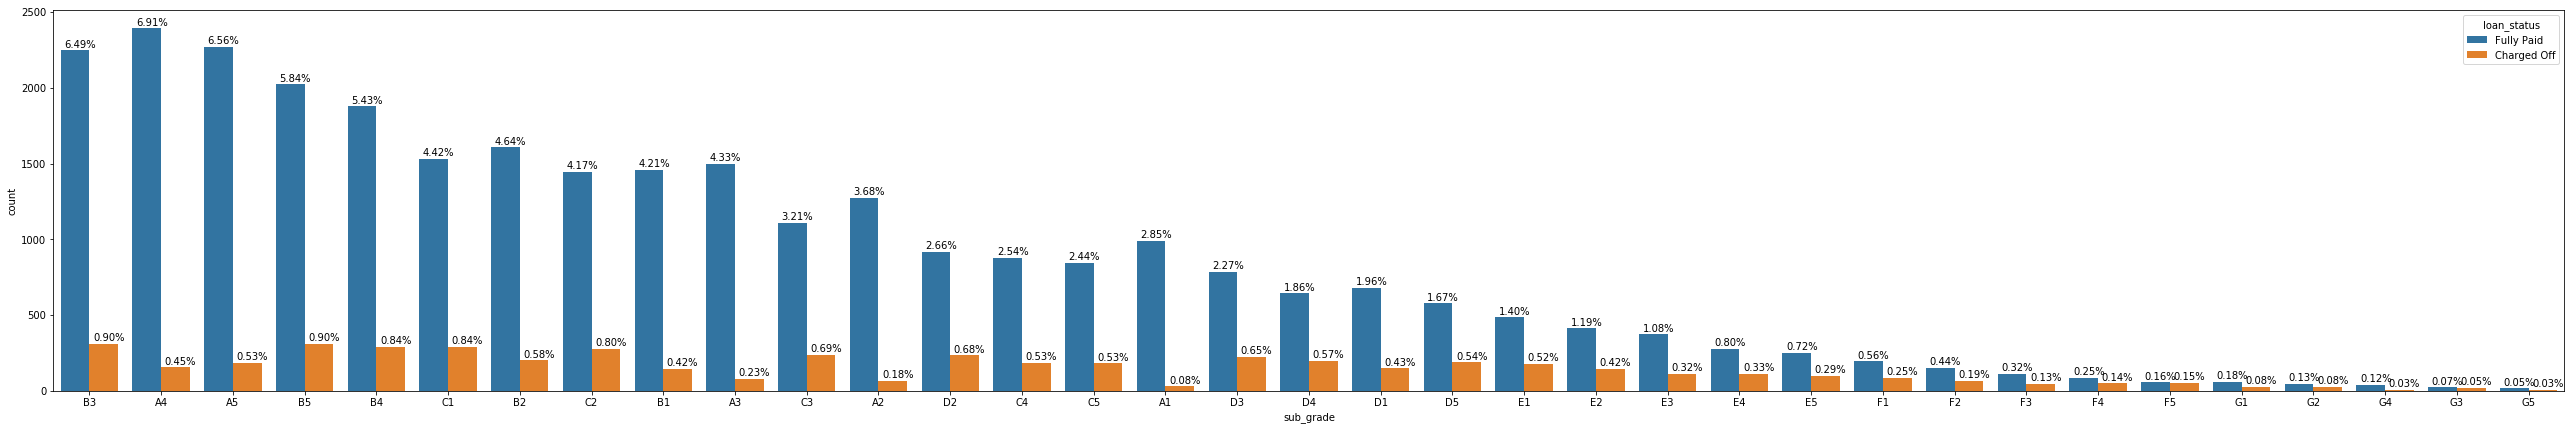

In [44]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='sub_grade',hue='loan_status')

In [45]:
cross_tab_ratio('sub_grade').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
sub_grade,,,
F5,51,56,0.911
G3,18,24,0.750
F4,50,88,0.568
G2,26,46,0.565
G5,9,17,0.529
G1,28,61,0.459
F1,85,194,0.438
F2,66,152,0.434
F3,46,111,0.414


**Findings:**
1. Some of the sample sizes are less than 30 and connot give a normal distribution. So this variable will be ignored

#### Employment Length

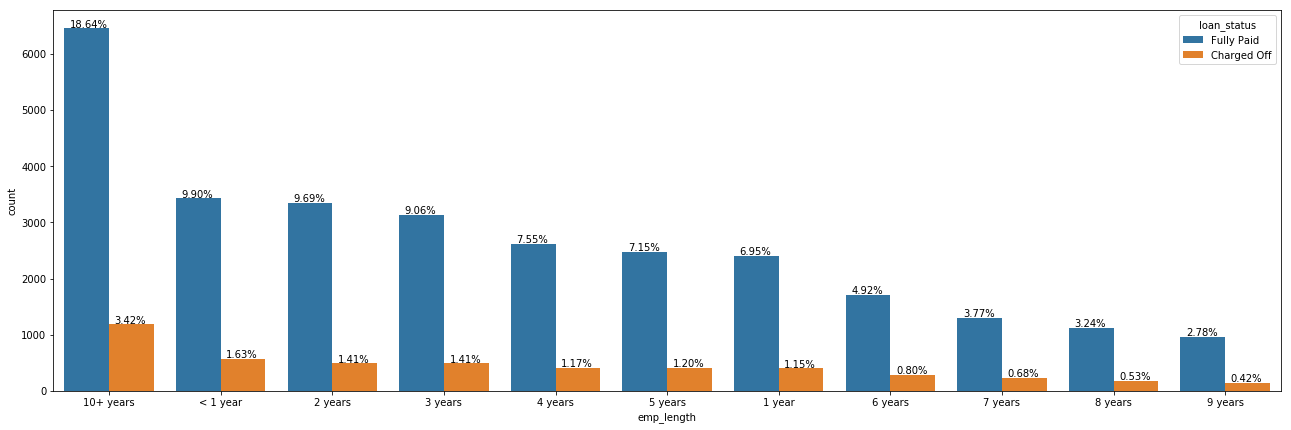

In [46]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='emp_length',hue='loan_status')

In [47]:
cross_tab_ratio('emp_length').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
emp_length,,,
10+ years,1185,6451,0.184
7 years,234,1305,0.179
5 years,415,2475,0.168
1 year,399,2405,0.166
< 1 year,563,3426,0.164
6 years,278,1702,0.163
8 years,183,1123,0.163
3 years,489,3136,0.156
4 years,406,2614,0.155


**Findings:**
1. Assuming emp_length 0 means, people who are self employed. For this category the ratio of Charged Off count to Fully Paid Count looks significantly high and we can consider this variable as a driving factor

#### Home Ownership

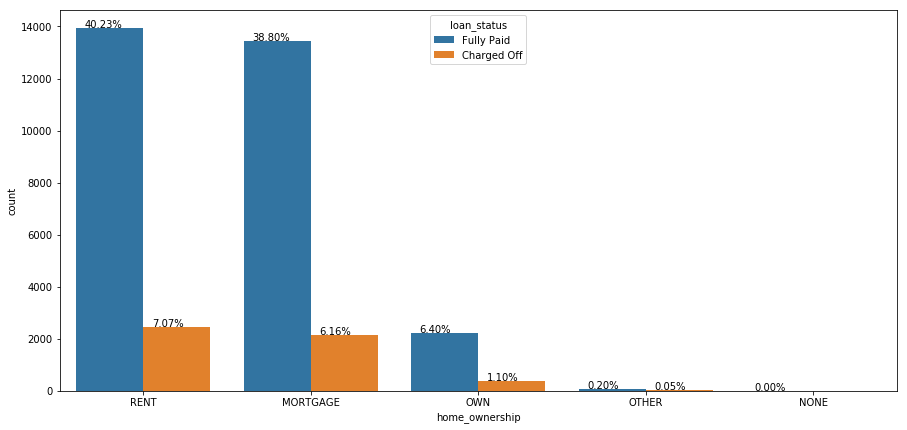

In [48]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='home_ownership',hue='loan_status')

In [49]:
cross_tab_ratio('home_ownership').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
home_ownership,,,
OTHER,16.000,68.000,0.235
RENT,2446.000,13923.000,0.176
OWN,382.000,2215.000,0.172
MORTGAGE,2131.000,13428.000,0.159
NONE,nan,1.000,nan


**Findings:**
1. Samples having vales less than 30 and might not give a normal distribution. Also all distributions with a count above 30 seems to have almost the same ratio. So we will discard this variable as a driving factor

#### Annual Income

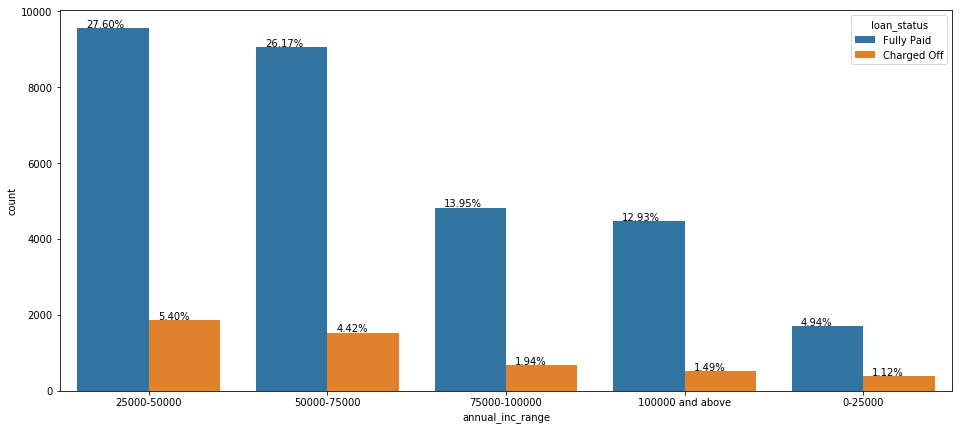

In [50]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_clean['annual_inc_range'] = pd.cut(loan_clean['annual_inc'], bins, labels=slot)
loan_clean['annual_inc_range'].value_counts()
plot_univariate_vs_loan_status(vtype = 'categorical', col='annual_inc_range', hue='loan_status')


In [51]:
cross_tab_ratio('annual_inc_range').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
annual_inc_range,,,
0-25000,387,1711,0.226
25000-50000,1869,9551,0.196
50000-75000,1529,9058,0.169
75000-100000,672,4829,0.139
100000 and above,517,4475,0.116


**Findings:**
1. The ratio of Charged Off count to Fully Paid Count looks high for the income group 0-25000 and we can consider this variable as a driving factor

#### Verification Status

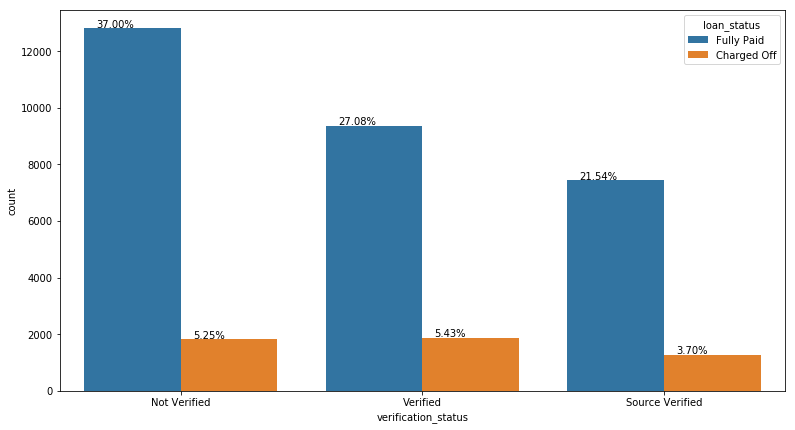

In [52]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='verification_status', hue='loan_status')

In [53]:
cross_tab_ratio('verification_status').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
verification_status,,,
Verified,1880,9374,0.201
Source Verified,1279,7456,0.172
Not Verified,1816,12805,0.142


**Findings:**
1. The ratio of Charged Off count to Fully Paid Count looks high for the verification_status value 'Verified' and we can consider this variable as a driving factor

####  Purpose

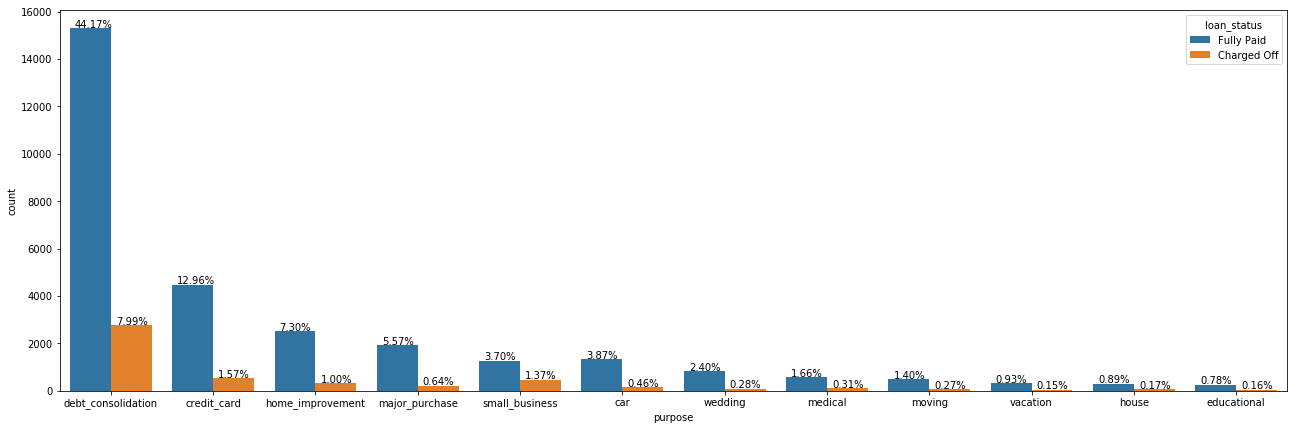

In [54]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='purpose', hue='loan_status', vertlabel=False)

In [55]:
cross_tab_ratio('purpose').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
purpose,,,
small_business,475,1279,0.371
educational,56,269,0.208
house,59,308,0.192
moving,92,484,0.190
medical,106,575,0.184
debt_consolidation,2767,15288,0.181
vacation,53,322,0.165
home_improvement,347,2528,0.137
credit_card,542,4485,0.121


**Findings:**
1. The ratio of Charged Off count to Fully Paid Count looks high for the purpose value 'small_business' and we can consider this variable as a driving factor

#### Address state

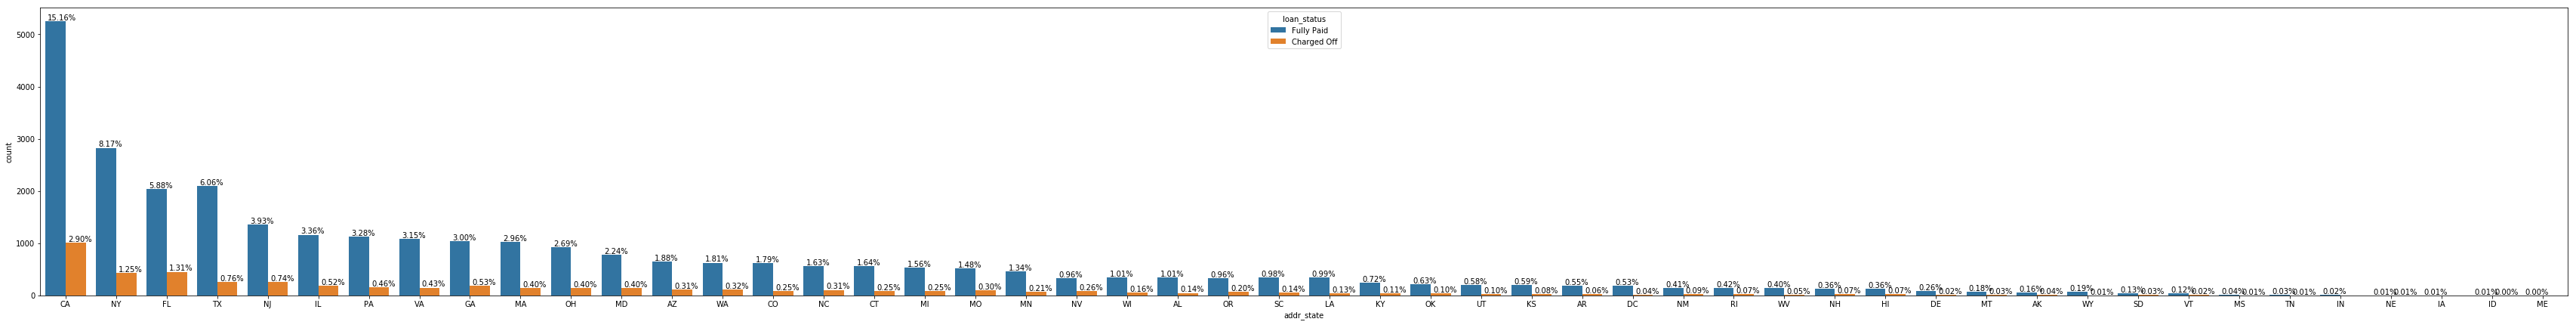

In [56]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='addr_state', hue='loan_status')

In [57]:
cross_tab_ratio('addr_state').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
addr_state,,,
NE,3.000,2.000,1.500
ID,1.000,3.000,0.333
NV,91.000,333.000,0.273
AK,15.000,56.000,0.268
SD,10.000,44.000,0.227
FL,454.000,2034.000,0.223
NM,30.000,142.000,0.211
OR,68.000,331.000,0.205
NH,25.000,123.000,0.203


**Findings:**
1. Lot of samples with count less than 30. So this variable will be ignored

#### dti

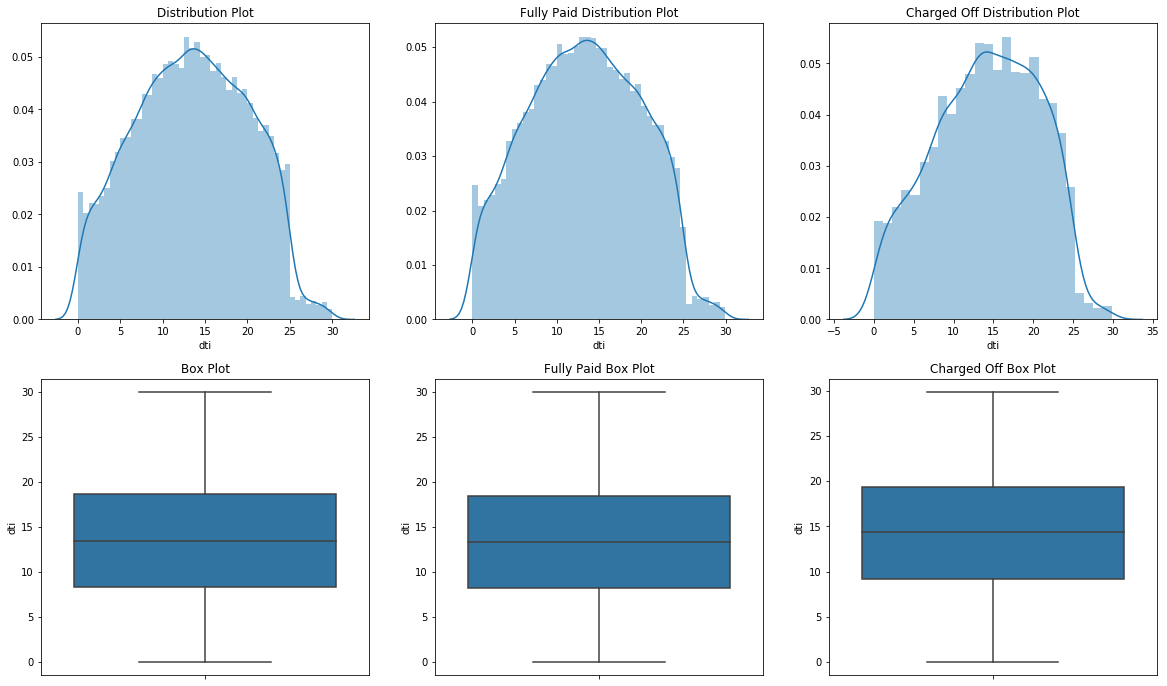

In [58]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='dti')

**Findings:**
1. Not much difference between the mean values for both Fully Paid and Charged Off. So this variable will be ignored.

#### delinq_2yrs

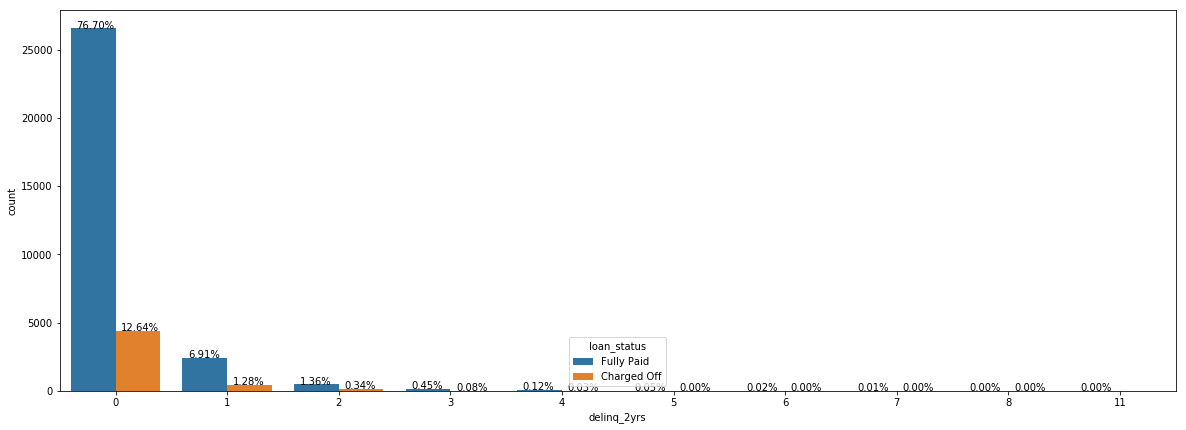

In [59]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='delinq_2yrs', hue='loan_status')

In [60]:
cross_tab_ratio('delinq_2yrs').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
delinq_2yrs,,,
8,1.000,1.000,1.000
7,1.000,3.000,0.333
2,116.000,470.000,0.247
4,9.000,42.000,0.214
1,443.000,2392.000,0.185
3,28.000,157.000,0.178
0,4375.000,26546.000,0.165
6,1.000,7.000,0.143
5,1.000,16.000,0.062


**Findings:**
1. Lot of samples with count less than 30. So this variable will be ignored

#### inq_last_6mths

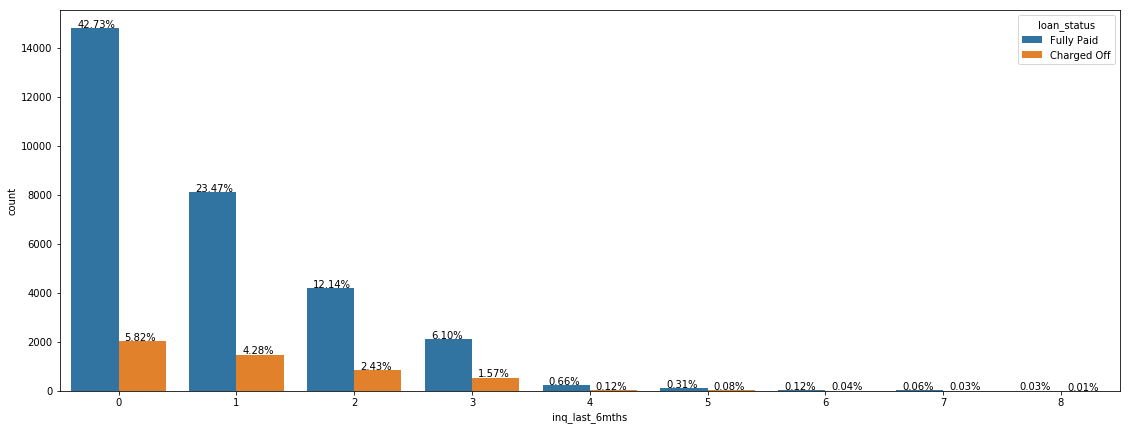

In [61]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='inq_last_6mths', hue='loan_status')

In [62]:
cross_tab_ratio('inq_last_6mths').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
inq_last_6mths,,,
7,10,22,0.455
6,15,42,0.357
8,3,10,0.300
3,543,2111,0.257
5,26,106,0.245
2,841,4201,0.200
1,1481,8124,0.182
4,40,229,0.175
0,2016,14790,0.136


**Findings:**
1. Lot of samples with count less than 30. So this variable will be ignored

#### open_acc

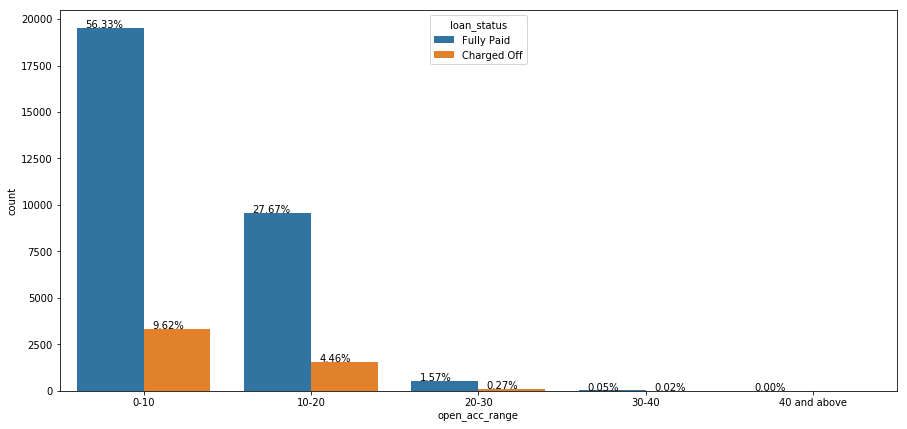

In [63]:
bins = [0, 10, 20, 30, 40 ,100]
slot = ['0-10', '10-20', '20-30', '30-40', '40 and above']
loan_clean['open_acc_range'] = pd.cut(loan_clean['open_acc'], bins, labels=slot)
plot_univariate_vs_loan_status(vtype = 'categorical', col='open_acc_range', hue='loan_status')

**Findings:**
1. Samples with count less than 30. So this variable will be ignored

#### pub_rec

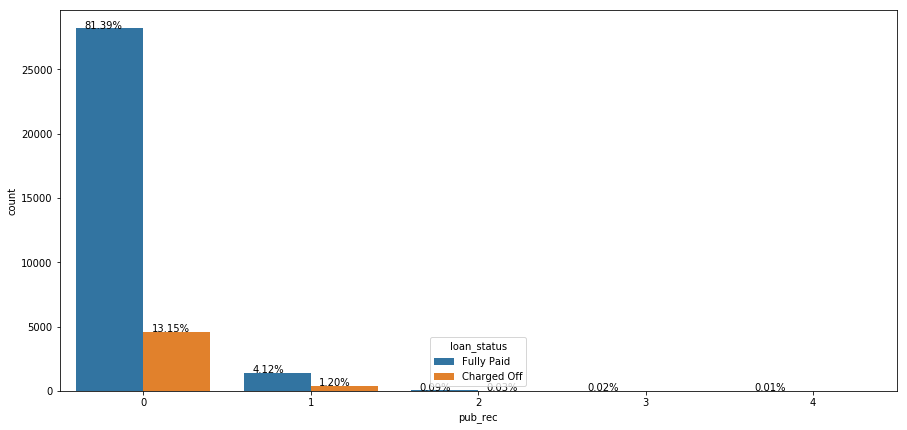

In [64]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='pub_rec', hue='loan_status')

**Findings:**
1. Samples with count less than 30. So this variable will be ignored

#### revol_bal

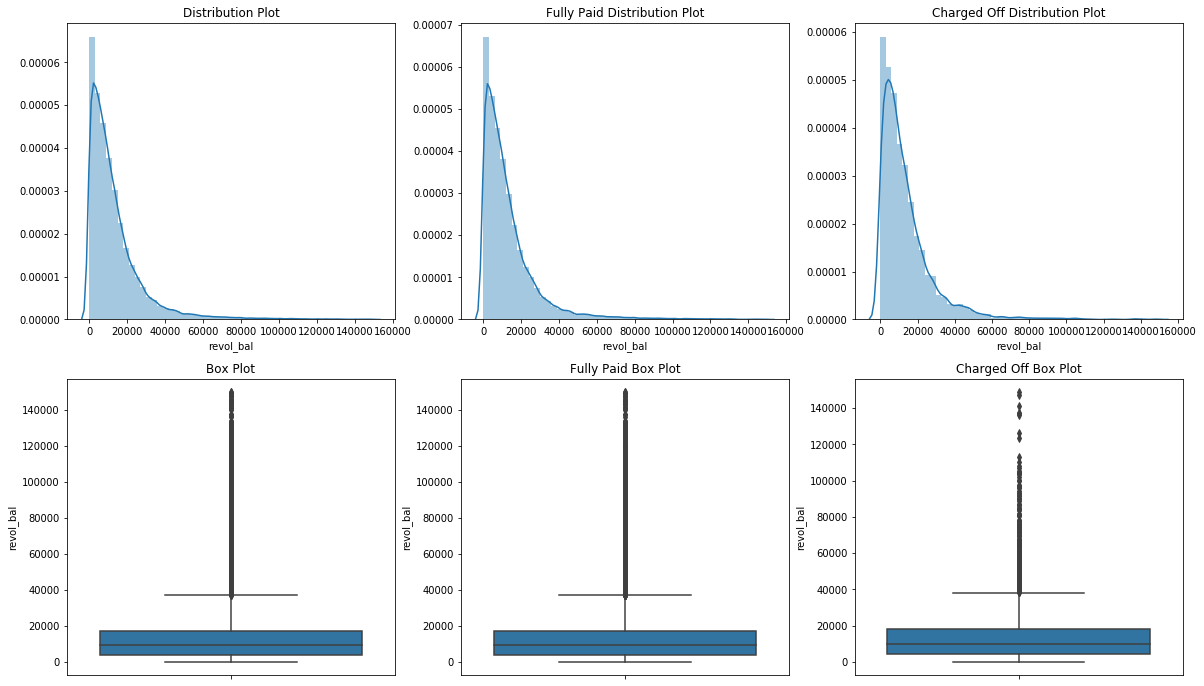

In [65]:
plot_univariate_vs_loan_status(vtype = 'continuous', col='revol_bal')

**Findings:**
1. Not much difference between the mean values for both Fully Paid and Charged Off. So this variable will be ignored.

#### issue_d

In [66]:
# split the month and year from columns issue_d and earliest_cr_line and create new columns with split values
new = loan_clean["issue_d"].str.split("-", n = 1, expand = True) 
loan_clean["issue_month"]= new[0] 

  

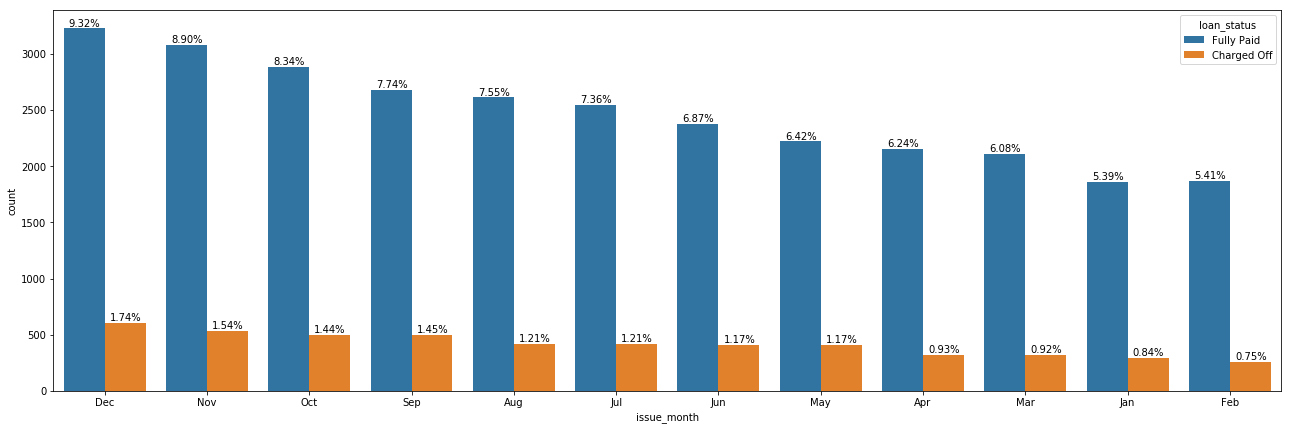

In [67]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='issue_month', hue='loan_status')

In [68]:
cross_tab_ratio('issue_month').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
issue_month,,,
Sep,502,2679,0.187
Dec,603,3227,0.187
May,405,2221,0.182
Oct,499,2885,0.173
Nov,532,3081,0.173
Jun,406,2379,0.171
Jul,420,2549,0.165
Aug,420,2613,0.161
Jan,290,1864,0.156


**Findings:**
1. Not much difference between ratio of Charged Off vs Fully Paid counts for each distribution. So this variable will be ignored.

#### earliest_cr_line

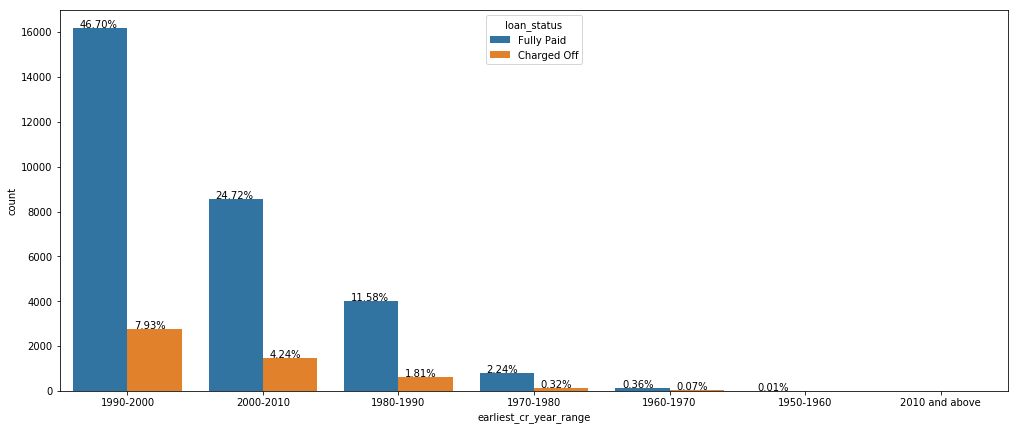

In [69]:
new = loan_clean["earliest_cr_line"].str.split("-", n = 1, expand = True) 
loan_clean["earliest_cr_line_month"]= new[0] 
loan_clean["earliest_cr_year"]= new[1].astype(int).astype(int)
loan_clean["earliest_cr_year"]= loan_clean["earliest_cr_year"].apply(lambda x: 1900 + x if x > 19 else 2000 + x ) 
bins = [1950, 1960, 1970, 1980, 1990 ,2000, 2010, 2020]
slot = ['1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010 and above']
loan_clean['earliest_cr_year_range'] = pd.cut(loan_clean['earliest_cr_year'], bins, labels=slot)
plot_univariate_vs_loan_status(vtype = 'categorical', col='earliest_cr_year_range', hue='loan_status')


In [70]:
cross_tab_ratio('earliest_cr_year_range').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
earliest_cr_year_range,,,
1960-1970,25.000,126.000,0.198
2000-2010,1468.000,8556.000,0.172
1990-2000,2744.000,16164.000,0.170
1980-1990,626.000,4008.000,0.156
1970-1980,112.000,776.000,0.144
1950-1960,nan,3.000,nan


In [71]:
cross_tab_ratio('earliest_cr_line_month').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
earliest_cr_line_month,,,
Apr,372,1999,0.186
Feb,381,2069,0.184
Jan,465,2529,0.184
Dec,537,3050,0.176
Mar,359,2079,0.173
May,370,2149,0.172
Jun,376,2211,0.170
Aug,413,2460,0.168
Sep,433,2703,0.160


**Findings:**
1. Not much difference between ratio of Charged Off vs Fully Paid counts for each distribution. So this variable will be ignored.

#### pub_rec_bankruptcies

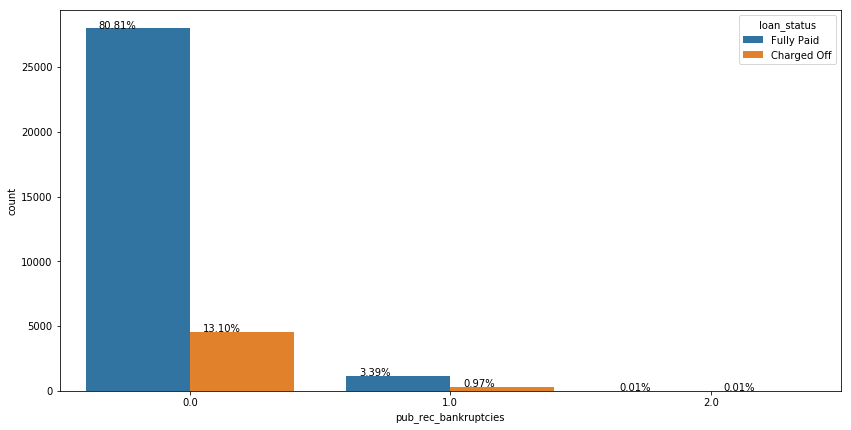

In [72]:
plot_univariate_vs_loan_status(vtype = 'categorical', col='pub_rec_bankruptcies', hue='loan_status')

In [73]:
cross_tab_ratio('pub_rec_bankruptcies').sort_values('ratio', ascending = False)

loan_status,Charged Off,Fully Paid,ratio
pub_rec_bankruptcies,,,
2.000,2,2,1.000
1.000,336,1175,0.286
0.000,4533,27970,0.162


**Findings:**
1. The ratio of Charged Off vs Fully Paid counts for pub_rec_bankruptcies seems to high for value 1. Can be considered as a driving factor

# Bivariate/Multivariate Analysis with Probability of Charged off

So we will be using a new term now Probability of Charged Off that will be equal to :

#### ProbabilityofChargedOff=Number of Applicants who chargedoff/Total No.ofApplicants


In [74]:
# Defining a function for deriving the cross tabs
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab


In [75]:
#  Defining a function for ploting Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()


#### Grade vs Probability of Charged Off

In [76]:
grade = crosstab(loan_clean,'grade')
display(grade)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,514,8421,8935,0.058
B,1257,9211,10468,0.120
C,1173,5812,6985,0.168
D,994,3603,4597,0.216
E,649,1799,2448,0.265
F,298,601,899,0.331
G,90,188,278,0.324


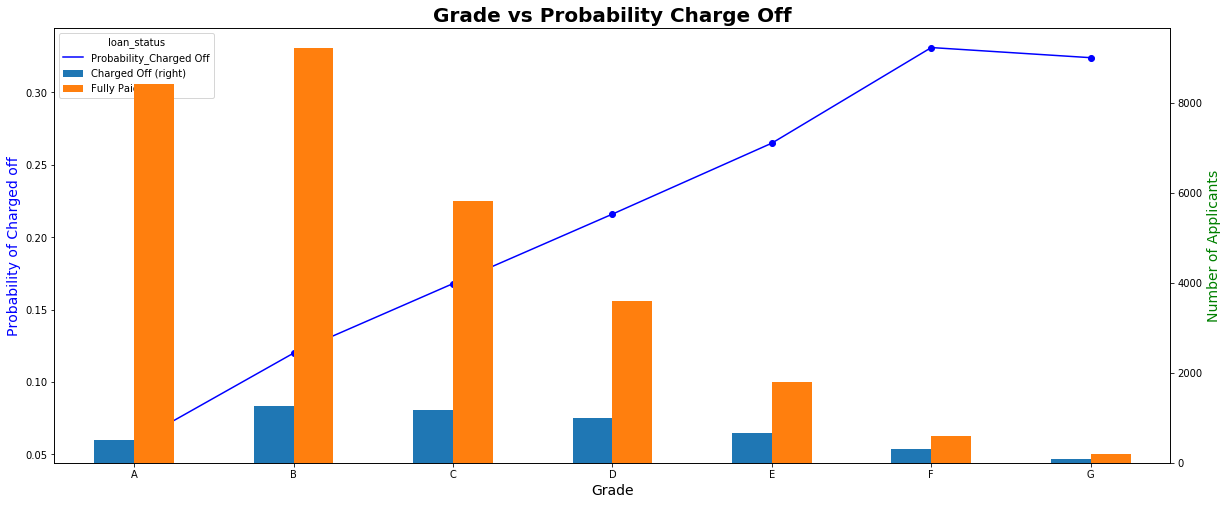

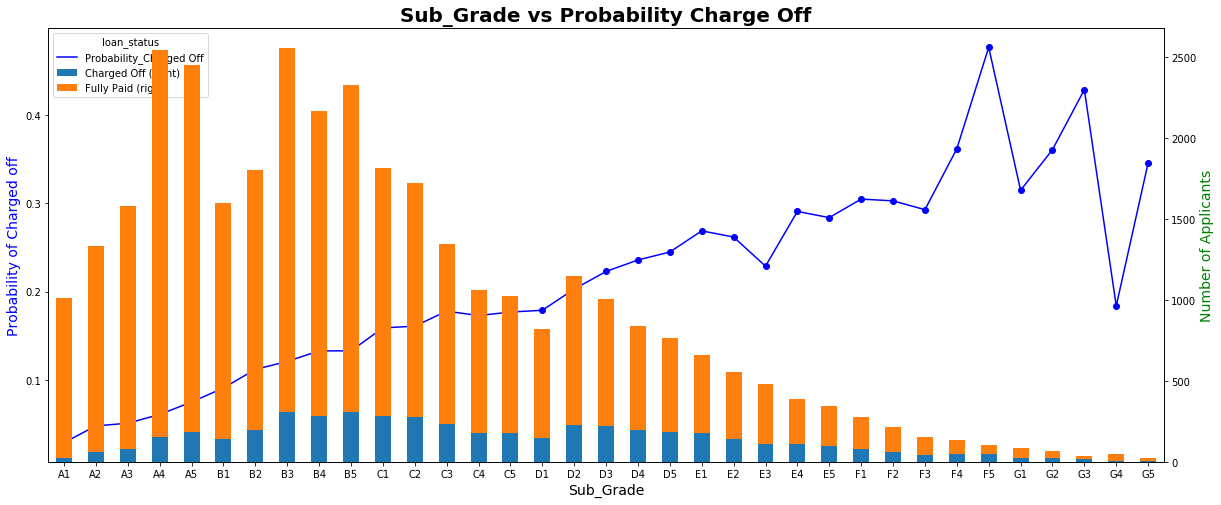

In [77]:
bivariate_prob(df =loan_clean,col ='grade',stacked=False)
bivariate_prob(df =loan_clean,col ='sub_grade')

#### Purpose of Loan vs Probability Charged Off



In [78]:
grade = crosstab(loan_clean,'home_ownership')
display(grade)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
home_ownership,,,,
MORTGAGE,2131,13428,15559,0.137
NONE,0,1,1,0.000
OTHER,16,68,84,0.190
OWN,382,2215,2597,0.147
RENT,2446,13923,16369,0.149


loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,160,1339,1499,0.107
credit_card,542,4485,5027,0.108
debt_consolidation,2767,15288,18055,0.153
educational,56,269,325,0.172
home_improvement,347,2528,2875,0.121
house,59,308,367,0.161
major_purchase,222,1928,2150,0.103
medical,106,575,681,0.156
moving,92,484,576,0.160


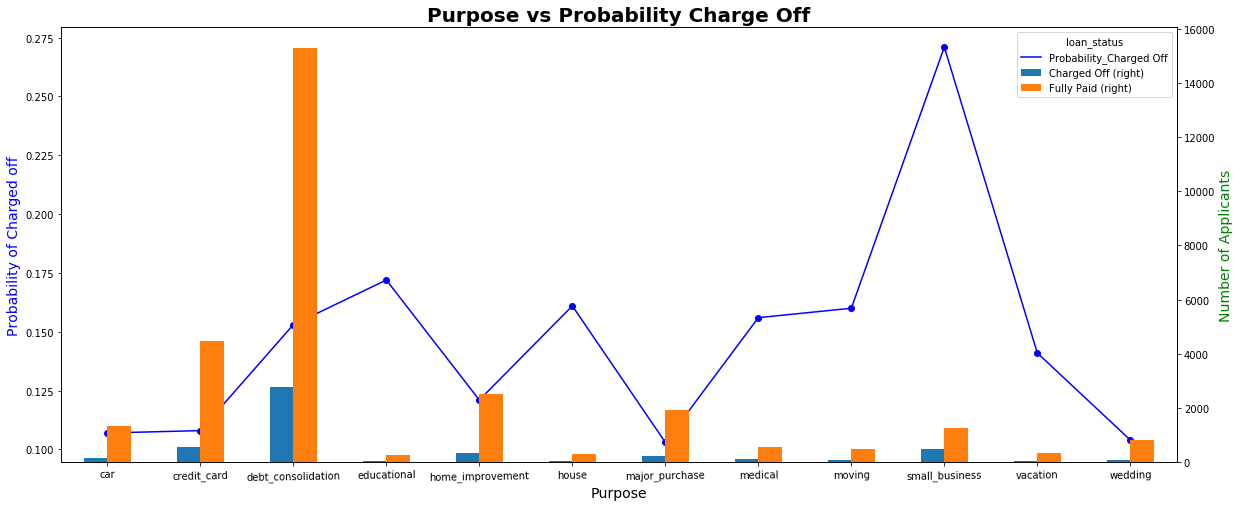

In [79]:
purpose = crosstab(loan_clean,'purpose')
display(purpose)

bivariate_prob(df =loan_clean,col ='purpose',stacked=False)

Insights: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 14%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

0    1
1    3
Name: loan_status_no, dtype: int64


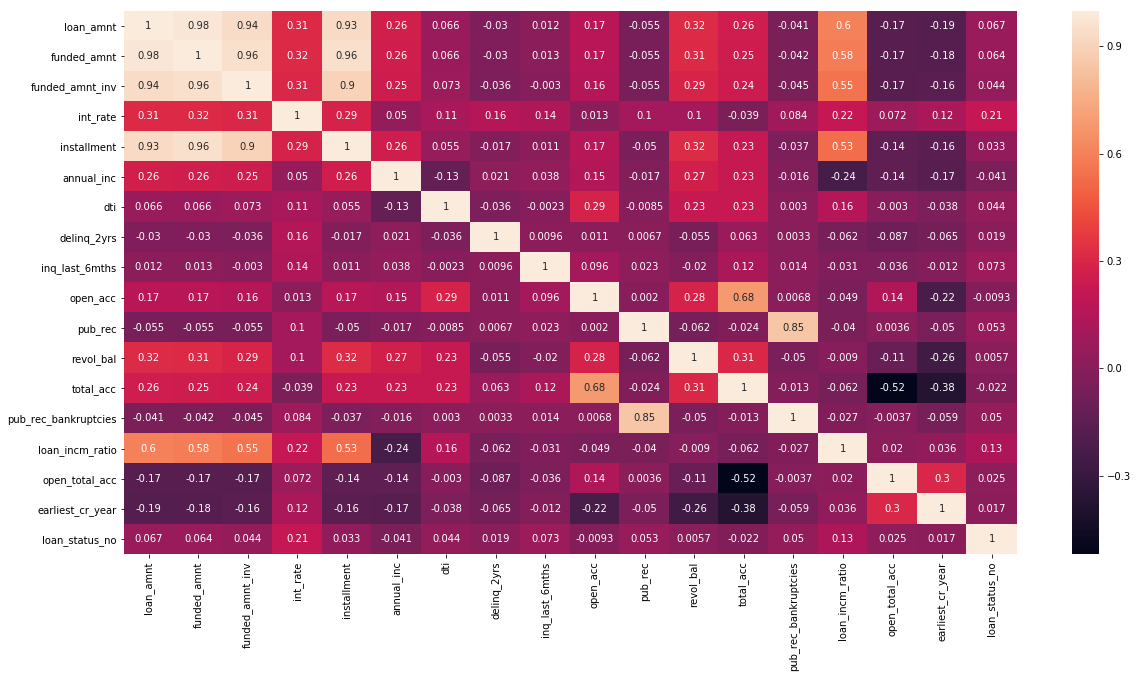

In [80]:
import seaborn as sns

#ploting Corelation
def loanStatus(x):
   if(x =='Charged Off'):
       return 3;
   if(x =='Current'):
       return 2;
   if(x =='Fully Paid'):
       return 1;
loan_clean['loan_status_no'] = loan_clean['loan_status'].apply(loanStatus)

print(loan_clean.loan_status_no.head(2))

corr = loan_clean.corr()

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot= True)
plt.show()


#### Annual Income Range vs Probability Charged Off

In [81]:
## Create Bins for range of Annual Income  
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_clean['annual_inc_range'] = pd.cut(loan_clean['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
0-25000,387,1711,2098,0.184
25000-50000,1869,9551,11420,0.164
50000-75000,1529,9058,10587,0.144
75000-100000,672,4829,4992,0.135
100000 and above,517,4475,5501,0.094


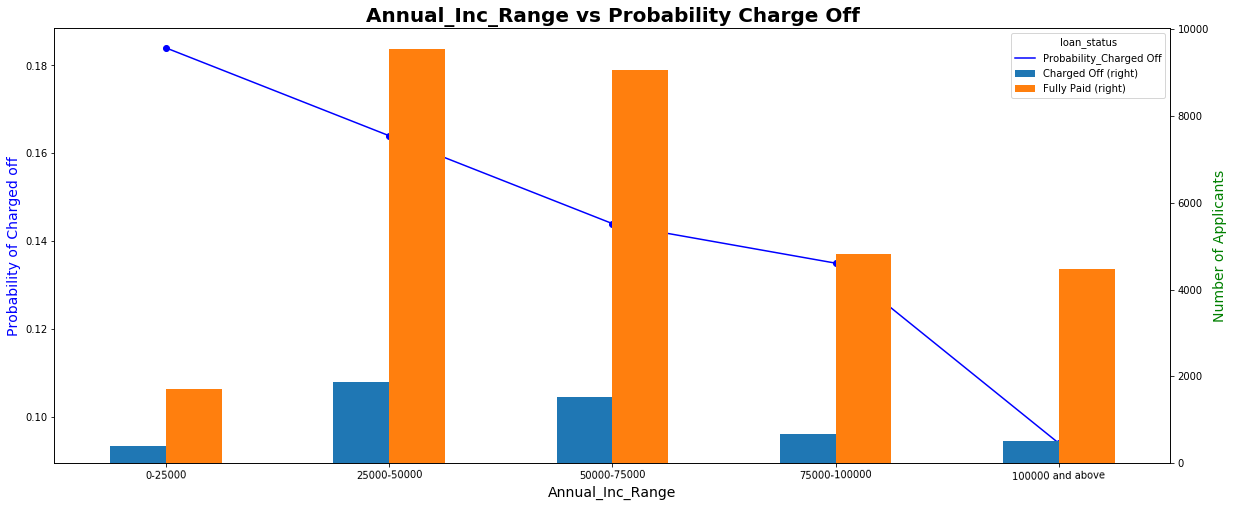

In [82]:
annualincome = crosstab(loan_clean,'annual_inc_range')
display(annualincome)

bivariate_prob(df =loan_clean,col ='annual_inc_range',stacked=False)

Insights: As the annual income is decreasing the probability that person will default is increasing with highest of 18% at (0 to 25000) salary bracket.

#### Employment Length vs Probability Charged Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
1 year,399,2405,2804,0.142
10+ years,1185,6451,7636,0.155
2 years,488,3352,3840,0.127
3 years,489,3136,3625,0.135
4 years,406,2614,3020,0.134
5 years,415,2475,2890,0.144
6 years,278,1702,1980,0.140
7 years,234,1305,1539,0.152
8 years,183,1123,1306,0.140


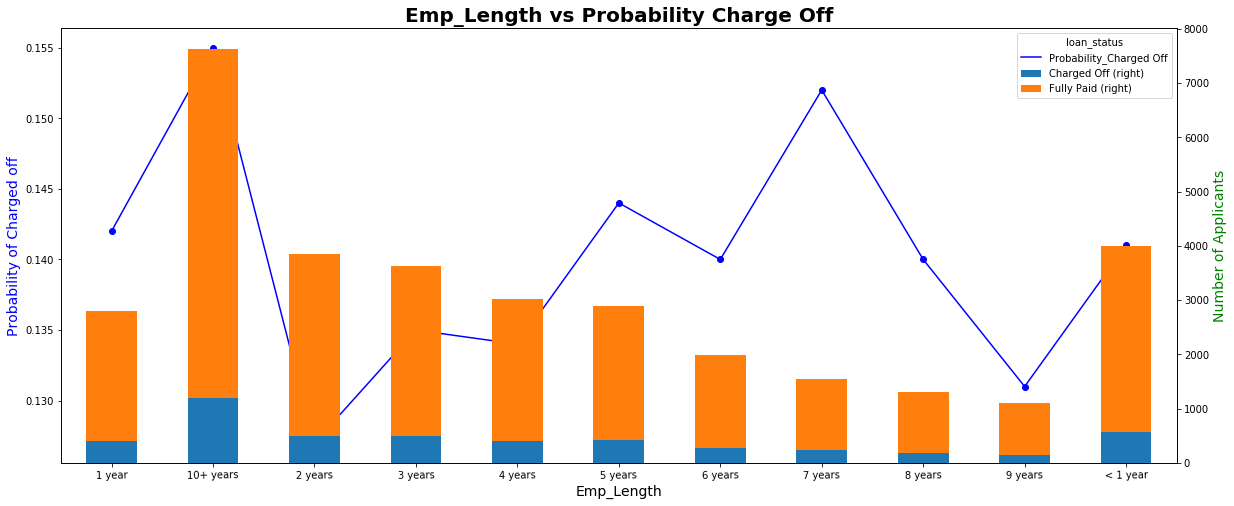

In [83]:
emp_length = crosstab(loan_clean,'emp_length')
display(emp_length)

bivariate_prob(df =loan_clean,col ='emp_length')

Insights: Applicants who are self employed & less than 1 year of experience are more probable of charged off..

#### Interest rate vs Probability of Charged Off

In [84]:
# create bin for Interest range 
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_clean['int_rate_range'] = pd.cut(loan_clean['int_rate'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
0-7.5,224,4595,6582,0.034
7.5-10,484,5697,8382,0.058
10-12.5,1098,7284,4819,0.228
12.5-15,1292,6638,7930,0.163
15 and above,1605,4977,6181,0.260


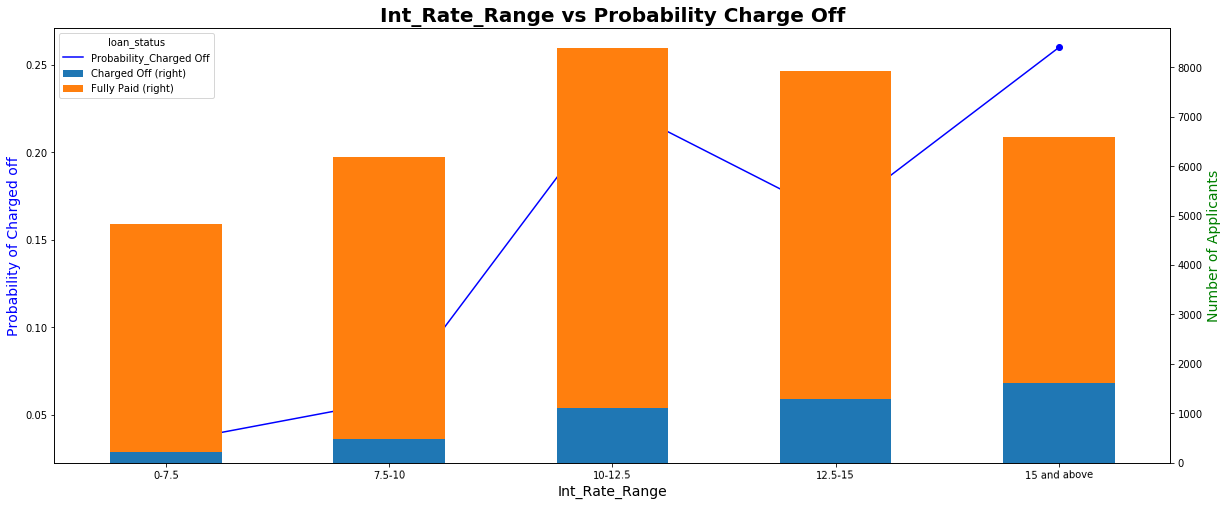

In [85]:
int_rate_range = crosstab(loan_clean,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_clean,col ='int_rate_range')

Insights: As the interest rate is increasing the probability that person will default is increasing with highest of 25% at 15% & above bracket.Also We saw probability of default has a spike on 10-12.5% interest rate. Reason could be people took high interest loan when has financial issues going on .

#### State vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
addr_state,,,,
NJ,255,1359,1614,0.158
NM,30,142,172,0.174
NV,91,333,424,0.215
NY,432,2828,3260,0.133
OH,140,931,1071,0.131
OK,35,218,253,0.138
OR,68,331,399,0.170
PA,159,1134,1293,0.123
RI,24,145,169,0.142


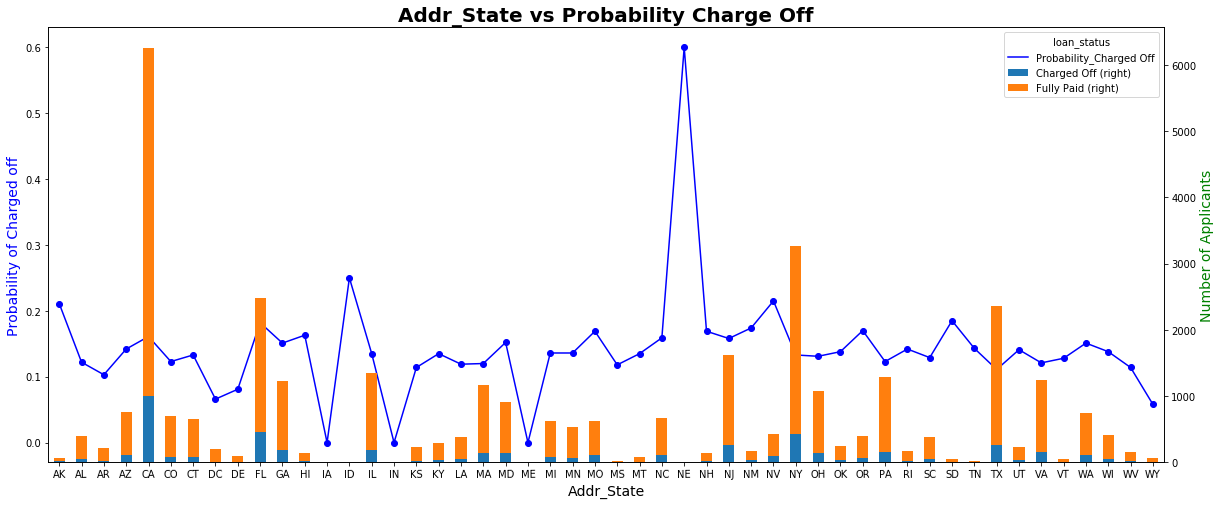

In [86]:
states = crosstab(loan_clean,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_clean,col ='addr_state')


Insights: Residence of State Nebraska has highest probability to be Defaulter

#### HomeOwner ship vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
home_ownership,,,,
MORTGAGE,2131,13428,15559,0.137
NONE,0,1,1,0.000
OTHER,16,68,84,0.190
OWN,382,2215,2597,0.147
RENT,2446,13923,16369,0.149


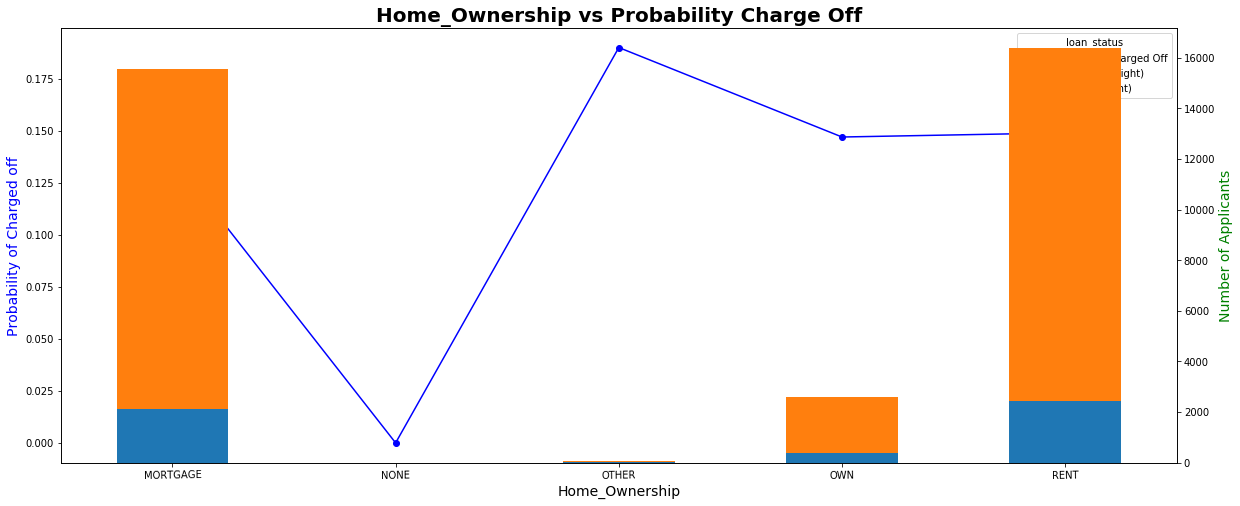

In [87]:
homeownership = crosstab(loan_clean,'home_ownership')
display(homeownership)

bivariate_prob(df =loan_clean,col ='home_ownership')


Insights: Customers has other ownership has more probability to become defaulter.

In [88]:
crosstab = pd.crosstab(loan_clean['home_ownership'], loan_clean['loan_status'],margins=True)
display(crosstab)




loan_status,Charged Off,Fully Paid,All
home_ownership,,,
MORTGAGE,2131,13428,15559
NONE,0,1,1
OTHER,16,68,84
OWN,382,2215,2597
RENT,2446,13923,16369
All,4975,29635,34610


## Hypothesis testing 

### Two sample T-test

#### A two sampled t-test, to test the significance in the difference in means assuming unequal variances has been performed for the continuous variables which seemed to have an influence on the loan_status value as per the above plots. 

#### The two samples have been derived by dividing the data frame basing on the loan_status i.e. sample A has records where loans have been Fully paid off and the other sample B has records where loan_status is charged off

Null Hypothesis H0: There is no signifcant difference in means across the two samples for the same variable
Alternative Hypothesis H1: There is significant difference in means across the two samples for the same variable

In [89]:
#Creating a data_frame loan_num to contain the variables of interest for the two sampled t-test
loan_num = loan_clean.loc[:,['loan_amnt','int_rate','loan_incm_ratio','loan_status']]
loan_num.head()

,loan_amnt,int_rate,loan_incm_ratio,loan_status
0,5000,10.650,0.208,Fully Paid
1,2500,15.270,0.083,Charged Off
2,2400,15.960,0.196,Fully Paid
5,5000,7.900,0.139,Fully Paid
6,7000,15.960,0.149,Fully Paid


In [90]:
# Creating a data frame to hold the first sample 'A' where loans have been Fully Paid 
loan_num_paid = loan_num.loc[loan_num['loan_status']== 'Fully Paid',:]

In [91]:
loan_num_paid.shape

(29635, 4)

In [92]:
# Creating a data frame to hold the second sample 'B' where loans have been Charged off
loan_num_notpaid = loan_num.loc[loan_num['loan_status']== 'Charged Off',:]

In [93]:
loan_num_notpaid.shape

(4975, 4)

In [94]:
# Creating a list of variables for iterating through the t-test function
vars = loan_num.columns.tolist()
print(vars)

['loan_amnt', 'int_rate', 'loan_incm_ratio', 'loan_status']


In [95]:
# Defining the function for performing the t-test
def t_test(variable):
    for x in variable:
        if x != 'loan_status':
            two_sample_results = scipy.stats.ttest_ind(loan_num_paid[x],loan_num_notpaid[x], equal_var = False)
            print("For variable",x,"the t-value is",two_sample_results[0],'and its p_value is', two_sample_results[1])

In [96]:
#Results of the t-test
t_test(vars)

For variable loan_amnt the t-value is -11.50372597887214 and its p_value is 2.5120763600428116e-30
For variable int_rate the t-value is -40.0225232964815 and its p_value is 0.0
For variable loan_incm_ratio the t-value is -21.460348104299474 and its p_value is 1.2236166053930174e-98


Basing on the above results of the two-sampled t-test, we can confidently say that there is a significant difference in means for the above three variables and can be considered as a driving factor for charged-off loans.

If we look at the p-value all these 3 variables seem to have a value which is almost zero

If we look at the t value all these 3 variable have a value which is in the critical region

Therefore we reject the Null Hyothesis and conclude that there is significant difference in means

#### Chi square test for independence among categorical variables and the target variable (loan_status):

In [97]:
loan_cat = loan_clean.iloc[:,:]

In [98]:
loan_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'loan_incm_ratio', 'open_total_acc',
       'annual_inc_range', 'open_acc_range', 'issue_month',
       'earliest_cr_line_month', 'earliest_cr_year', 'earliest_cr_year_range',
       'loan_status_no', 'int_rate_range'],
      dtype='object')

In [99]:
loan_cat['grade'] = loan_cat.grade.astype('category')
loan_cat['purpose'] = loan_cat.purpose.astype('category')
loan_cat['emp_length'] = loan_cat.emp_length.astype('category')
loan_cat['loan_status'] = loan_cat.loan_status.astype('category')
loan_cat['pub_rec_bankruptcies'] = loan_cat.pub_rec_bankruptcies.astype('category')
loan_cat['verification_status'] = loan_cat.verification_status.astype('category')

In [100]:
#Chi square test is used to determine if there is a significant relationship between two categorical variables
#H0 = The null hypothesis for this test is that there is no relationship between categorical predictor variable and 
# the target i.e. loan_status
#H1 = The alternative hypothesis for this test is that there is a significant relationship between the categorical 
# predictor and the taget variable i.e. loan_status
def chi(df,var1,var2, p_value = True):
    group_sizes = df.groupby([var1,var2]).size()
    ctsum = group_sizes.unstack(var1)
    if p_value == True:
        return chi2_contingency(ctsum.fillna(0))[1]
    else:
        return(var1,var2,chi2_contingency(ctsum.fillna(0)))

In [101]:
loan_cat = loan_cat.select_dtypes(include = ['category'])

In [102]:
for i in loan_cat.columns:
    if i!= 'loan_status':
        print("P-value of",i,"=",chi(loan_cat,i,'loan_status'))

P-value of grade = 4.624380808081769e-308
P-value of emp_length = 0.009320845551892876
P-value of verification_status = 1.8004187624117597e-21
P-value of purpose = 9.155689331372296e-73
P-value of pub_rec_bankruptcies = 3.414273027704393e-19
P-value of annual_inc_range = 1.0306057074362072e-31
P-value of open_acc_range = 0.11085936669960446
P-value of earliest_cr_year_range = 0.21801557283367465
P-value of int_rate_range = 5.615514673033077e-255


The p-values of the variables 'grade','emp_length','purpose' and 'annual_inc_range' is almost equal to 0, which shows that there is a high significant relationship between the these categorical variables and the target variable i.e. loan_status

# Results:

Basing on the visual plots renderrred during the univariate analysis and bivariate analysis and the supplemental information derived through the Hypothesis testing (Two sampled t-test for continuous variables and Chi square test to test the strength of the relationship between categorical variables and the target variable), we conclude that the below variables have the greatest impact for driving the loan_status to end up as 'Charged-off':  
1) **int_rate** : Records having higher interest rate tend to default more  
2) **loan_incm_ratio**: Records having a higher loan to income ration tend to default more  
3) **purpose**: Records having their pupose as 'Small business" tend to default more  
4) **grade**: Records having their grade as 'E', 'F' or 'G' tend to default more  
5) **emp_length**: Records having emp_length lesser than 1 year or 'self employed' tend to default more  
6) **annual_inc_range**: Records having an annual income range of lesser than 25000 tend to default more